# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y vehículos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 imágenes a color de 10 clases de animales y vehículos. El dataset en cuestión se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es más complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y vehículos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ vehículos en pantalla (si bien el elemento a clasificar siempre aparece en la posición predominante).

## Carga de los datos

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10

from tensorflow import keras
from keras.utils import to_categorical

In [3]:
# Primero, definimos los datos de entrenamiento, validación y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [4]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [6]:
# Esta variable contiene un mapeo de número de clase a elemento (animal o vehículo).
# La incluimos para ayudarte con la identificación de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

In [8]:
# Función auxiliar para convertir las etiquetas a codificación one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validación y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es también un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.

## Análisis de los datos
Este trabajo empieza analizando el dataset, se obserca que el conjunto de entrenamiento está compuesto por 40.000 imágenes, el de validación por 10.000 y el de prueba por otros 10.000. Todas las imágenes tiene un tamaño 32×32×3 con valores ya normalizados en el rango [0, 1].

La distribución de clases se encuentra balanceada, con aproximadamente 4.000 imágenes por clase, lo que garantiza que el modelo no esté sesgado hacia ninguna categoría.

La media global de los píxeles es 0.473, con desviación estándar 0.252, mientras que el análisis por canal RGB muestra medias de 0.491, 0.482 y 0.446 y desviaciones estándar de 0.247, 0.244 y 0.262 respectivamente.

Esta información indica que las imágenes presentan variabilidad de color y brillo, siendo los animales más diversos en apariencia que los vehículos, lo que puede influir en la dificultad de clasificación para algunas clases.

Finalmente, indicar que la visualización de muestras aleatorias y de un ejemplo por clase permitió corroborar la variabilidad en poses, colores y fondos presentes en el dataset.

Tamaño del set de entrenamiento: (40000, 32, 32, 3)
Tamaño del set de validación: (10000, 32, 32, 3)
Tamaño del set de test: (10000, 32, 32, 3)
Rango de valores normalizados: 0.0 → 1.0

Distribución de clases:


,clase_id,clase_nombre,cantidad
0,0,avion,3986
1,1,coche,3986
2,2,ave,4048
3,3,gato,3984
4,4,ciervo,4003
5,5,perro,3975
6,6,rana,4020
7,7,caballo,4023
8,8,barco,3997
9,9,camion,3978


/tmp/ipython-input-1437340685.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = MAP_ELEMENTS[int(y_train[index])]


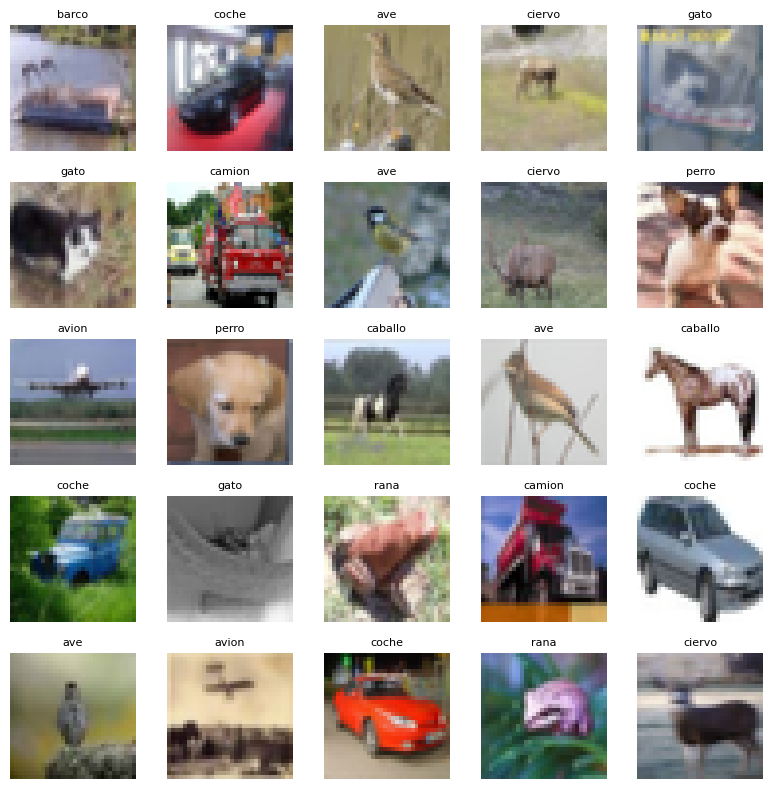

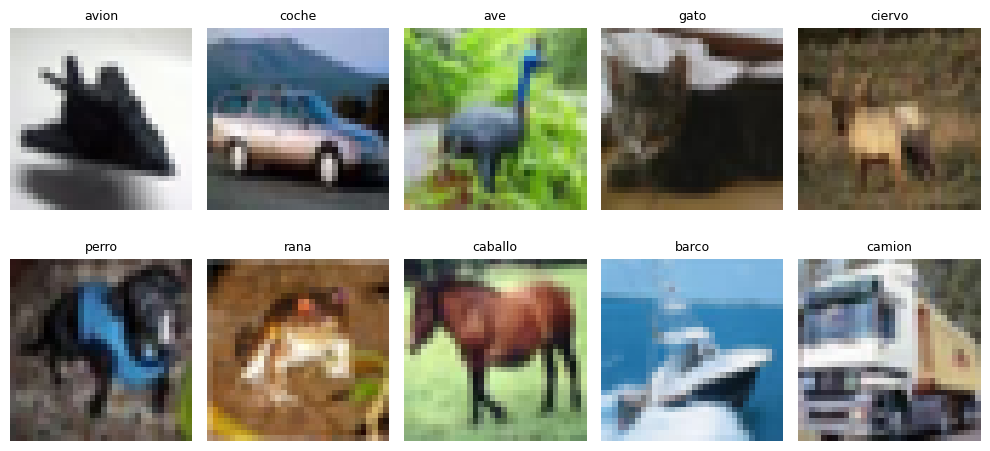


Media global: 0.47324696247574394
Desviación estándar global: 0.25173213355349583

Media por canal (R,G,B): [0.49145363 0.48206213 0.44622512]
Desviación estándar por canal (R,G,B): [0.24716829 0.24370658 0.26169213]


In [9]:

# 1. Información básica
print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de validación:", x_valid.shape)
print("Tamaño del set de test:", x_test.shape)
print("Rango de valores normalizados:", x_train.min(), "→", x_train.max())

# 2. Distribución de clases
unique, counts = np.unique(y_train, return_counts=True)

df_dist = pd.DataFrame({
    "clase_id": unique,
    "clase_nombre": [MAP_ELEMENTS[i] for i in unique],
    "cantidad": counts
})

print("\nDistribución de clases:")
display(df_dist)

# 3. Visualización de 25 imágenes aleatorias
plt.figure(figsize=(8,8))
idx = np.random.choice(len(x_train), 25, replace=False)

for i, index in enumerate(idx):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[index])
    label = MAP_ELEMENTS[int(y_train[index])]
    plt.title(label, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

# 4. Un ejemplo por clase
plt.figure(figsize=(10,5))
for class_id in range(10):
    idx_class = np.where(y_train == class_id)[0][0]  # primer ejemplo
    plt.subplot(2,5,class_id+1)
    plt.imshow(x_train[idx_class])
    plt.title(MAP_ELEMENTS[class_id], fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

# 5. Estadísticas básicas del dataset
print("\nMedia global:", np.mean(x_train))
print("Desviación estándar global:", np.std(x_train))

means = np.mean(x_train, axis=(0,1,2))
stds  = np.std(x_train, axis=(0,1,2))

print("\nMedia por canal (R,G,B):", means)
print("Desviación estándar por canal (R,G,B):", stds)


## Modelos seleccionados
Para abordar el problema de clasificación de CIFAR-10, se seleccionan tres tipos de modelos con el objetivo de analizar la evolución en precisión y capacidad de generalización.

Se denomina Modelo A al modelo fully connected (denso), que funciona como referencia inicial para evaluar el rendimiento de una red sin convoluciones y comprender la importancia de la estructura espacial de las imágenes. Este modelo no tiene capas convolucionales, aplana las imágenes y utiliza únicamente capas densas con activación ReLU y softmax en la salida.

El Modelo B corresponde a un CNN simple, compuesto por dos bloques de convolución seguidos de max pooling, con filtros de tamaño 3×3 y activación ReLU. El objetivo es capturar patrones locales como bordes y texturas, y mejorar la capacidad de clasificación respecto al Modelo A. Se utiliza un optimizador Adam, con tasa de aprendizaje estándar, y una capa fully connected final para la clasificación de las 10 clases.

Finalmente, el Modelo C es un CNN más profundo, con varios bloques de convolución y pooling, incorporando Dropout como técnica de regularización para reducir el sobreajuste y Batch Normalization para estabilizar el entrenamiento y mejorar la generalización. La arquitectura incluye más filtros por capa y mayor profundidad, lo que permite extraer características más complejas. El optimizador elegido es Adam, ajustando hiperparámetros como tasa de aprendizaje y tamaño de batch para maximizar la precisión en el conjunto de test.

Estos tres modelos permiten comparar de manera explícita cómo la profundidad de la arquitectura, el uso de técnicas de regularización, la normalización por lotes y los hiperparámetros influyen en el desempeño de los modelos.



In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

input_shape = (32,32,3)
num_classes = 10
model_A = Sequential([

    # Flatten: aplana la imagen de entrada en un vector 1D
    # input_shape=input_shape define la forma de la imagen (32,32,3 para CIFAR-10)
    Flatten(input_shape=input_shape),

    # Dense: capa completamente conectada con 512 neuronas
    # activation='relu' aplica la función de activación ReLU, introduciendo no linealidad
    Dense(512, activation='relu'),

    # Dropout: técnica de regularización para evitar sobreajuste
    # Dropout(0.5) descarta aleatoriamente el 50% de las neuronas durante el entrenamiento
    Dropout(0.5),

    # Capa de salida Dense con 'num_classes' neuronas (10 para CIFAR-10)
    # activation='softmax' convierte las salidas en probabilidades para cada clase
    Dense(num_classes, activation='softmax')
])

# Compilación del modelo
model_A.compile(
    # Optimizer: 'adam' es un optimizador adaptativo eficiente para redes densas
    optimizer='adam',

    # Loss: 'categorical_crossentropy' se usa para clasificación multiclase con etiquetas one-hot
    loss='categorical_crossentropy',

    # Metrics: evaluamos la precisión durante el entrenamiento y la validación
    metrics=['accuracy']
)

# --------------------------
# Modelo B: CNN Simple
# --------------------------

# Se crea un modelo secuencial, donde las capas se agregan en orden
model_B = Sequential([

    # Primera capa convolucional
    # Conv2D(32, (3,3)): 32 filtros de tamaño 3x3
    # activation='relu': función de activación ReLU para introducir no linealidad
    # padding='same': mantiene el tamaño espacial de la imagen (32x32)
    # input_shape=input_shape: forma de la imagen de entrada (32,32,3)
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),

    # MaxPooling2D: reduce la dimensión espacial (downsampling)
    # (2,2) toma el máximo de cada bloque 2x2, reduciendo a la mitad altura y ancho
    MaxPooling2D((2,2)),

    # Segunda capa convolucional
    # Conv2D(64, (3,3)): 64 filtros de tamaño 3x3 para extraer características más complejas
    # activation='relu' y padding='same' como antes
    Conv2D(64, (3,3), activation='relu', padding='same'),

    # Segundo MaxPooling: reduce nuevamente la dimensión espacial a la mitad
    MaxPooling2D((2,2)),

    # Flatten: aplana la salida de la última capa convolucional para conectarla con capas densas
    Flatten(),

    # Capa densa con 128 neuronas y activación ReLU
    Dense(128, activation='relu'),

    # Dropout 0.5: descarta aleatoriamente el 50% de las neuronas durante entrenamiento
    Dropout(0.5),

    # Capa de salida: 'num_classes' neuronas con softmax para obtener probabilidades de cada clase
    Dense(num_classes, activation='softmax')
])

# Compilación del modelo
model_B.compile(
    optimizer='adam',                 # Optimizer Adam, ajusta automáticamente tasas de aprendizaje
    loss='categorical_crossentropy',  # Función de pérdida para clasificación multiclase
    metrics=['accuracy']              # Métrica principal: precisión
)
# Se crea un modelo secuencial con varias capas convolucionales, normalización y dropout
model_C = Sequential([

    # Primera capa convolucional
    # 32 filtros de tamaño 3x3, activación ReLU, padding='same' para mantener dimensiones
    # input_shape=input_shape define la forma de la imagen de entrada (32,32,3)
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),

    # BatchNormalization: normaliza la salida de la capa anterior, estabilizando y acelerando el entrenamiento
    BatchNormalization(),

    # Segunda capa convolucional con 32 filtros
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),  # Normalización nuevamente

    # MaxPooling2D: reduce dimensiones espaciales a la mitad (downsampling)
    MaxPooling2D((2,2)),

    # Dropout 0.25: descarta aleatoriamente el 25% de las neuronas para reducir sobreajuste
    Dropout(0.25),

    # Tercer bloque convolucional con 64 filtros
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),

    # Cuarta capa convolucional con 64 filtros
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),

    # Segundo MaxPooling: reduce dimensiones espaciales nuevamente
    MaxPooling2D((2,2)),

    # Dropout 0.25 para regularización
    Dropout(0.25),

    # Flatten: aplana la salida 3D de las convoluciones para conectarla a capas densas
    Flatten(),

    # Capa densa con 256 neuronas y activación ReLU
    Dense(256, activation='relu'),

    # Dropout 0.5 para mayor regularización antes de la salida
    Dropout(0.5),

    # Capa de salida: 'num_classes' neuronas con softmax para clasificación multiclase
    Dense(num_classes, activation='softmax')
])

# Compilación del modelo
model_C.compile(
    optimizer='adam',                 # Optimizer Adam: adaptativo y eficiente para CNNs
    loss='categorical_crossentropy',  # Función de pérdida multiclase con one-hot
    metrics=['accuracy']              # Métrica de desempeño: precisión
)

# --------------------------
# Resumen de los modelos
# --------------------------
print("Resumen Modelo A:")
model_A.summary()
print("\nResumen Modelo B:")
model_B.summary()
print("\nResumen Modelo C:")
model_C.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Resumen Modelo A:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)


Resumen Modelo B:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)


Resumen Modelo C:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,738 (4.26 MB)

 Trainable params: 1,117,354 (4.26 MB)

 Non-trainable params: 384 (1.50 KB)

3. Entrenamientos

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2049 - loss: 2.2027 - val_accuracy: 0.3115 - val_loss: 1.9059
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2660 - loss: 1.9924 - val_accuracy: 0.3200 - val_loss: 1.8644
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2669 - loss: 1.9600 - val_accuracy: 0.3419 - val_loss: 1.8351
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2773 - loss: 1.9409 - val_accuracy: 0.3484 - val_loss: 1.8477
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2856 - loss: 1.9277 - val_accuracy: 0.3583 - val_loss: 1.8194
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2906 - loss: 1.9162 - val_accuracy: 0.3714 - val_loss: 1.7950
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3008 - loss: 1.8965 - val_accuracy: 0.3603 - val_loss: 1.8151
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2960 - loss: 1.9013 - val_accuracy: 0.

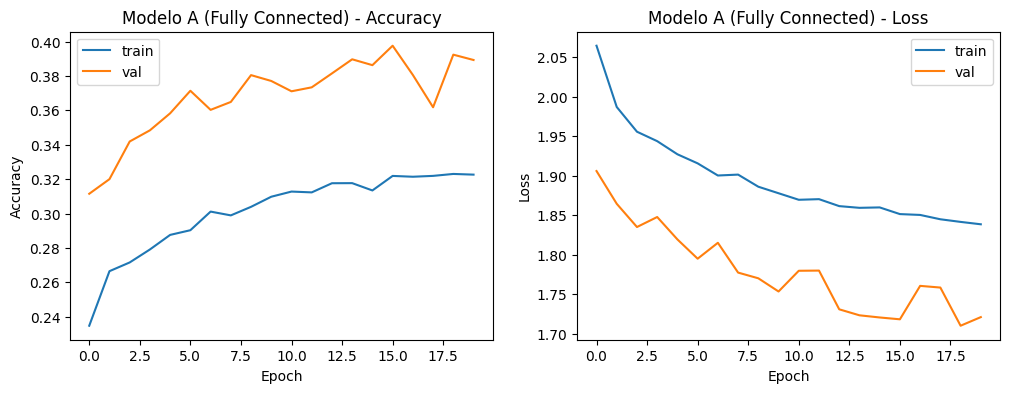

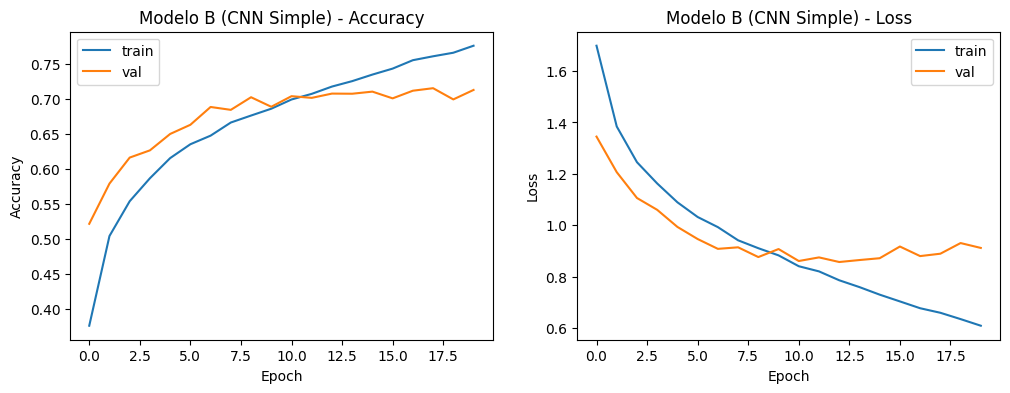

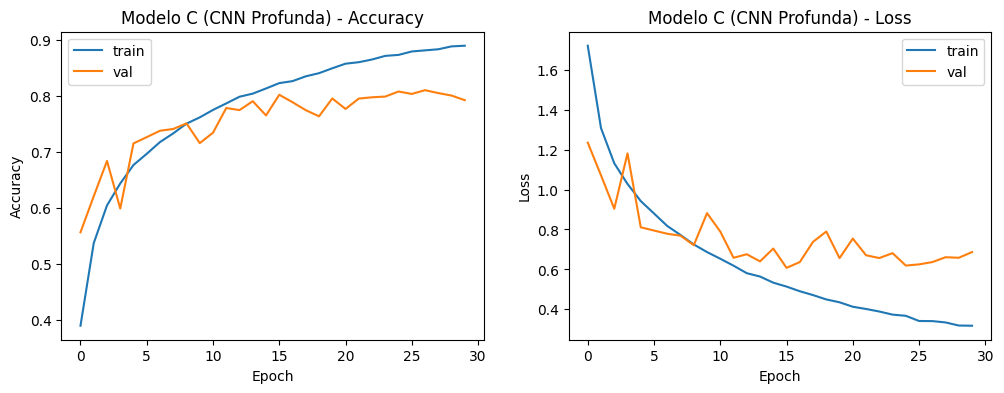

In [21]:
import matplotlib.pyplot as plt

# Parámetros comunes
batch_size = 64
epochs_A = 20  # Fully Connected
epochs_B = 20  # CNN Simple
epochs_C = 30  # CNN Profunda (más épocas por complejidad)

# --------------------------
# Entrenamiento Modelo A
# --------------------------
history_A = model_A.fit(
    x_train, y_train_one_hot,
    validation_data=(x_valid, y_valid_one_hot),
    batch_size=batch_size,
    epochs=epochs_A,
    verbose=1
)

# --------------------------
# Entrenamiento Modelo B
# --------------------------
history_B = model_B.fit(
    x_train, y_train_one_hot,
    validation_data=(x_valid, y_valid_one_hot),
    batch_size=batch_size,
    epochs=epochs_B,
    verbose=1
)

# --------------------------
# Entrenamiento Modelo C
# --------------------------
history_C = model_C.fit(
    x_train, y_train_one_hot,
    validation_data=(x_valid, y_valid_one_hot),
    batch_size=batch_size,
    epochs=epochs_C,
    verbose=1
)

# ============================
# Función para graficar resultados
# ============================
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# --------------------------
# Graficar los entrenamientos
# --------------------------
plot_history(history_A, "Modelo A (Fully Connected)")
plot_history(history_B, "Modelo B (CNN Simple)")
plot_history(history_C, "Modelo C (CNN Profunda)")


## Comparación de modelos

Para comparar los modelos, el presente trabajo sigue un criterio de precisión, evaluando además recall y F1-score, tanto por clase individual como por grupo general (Transporte y Animal

El Modelo A (Fully Connected) muestra un desempeño limitado. Por clase, la precision y el recall son bajos en animales como gato, perro y ave, lo que indica que la red no captura adecuadamente la estructura espacial de las imágenes. Las clases de vehículos y objetos más simples, como coche y camión, presentan resultados ligeramente mejores, aunque todavía inferiores a los modelos convolucionales. Analizando los grupos generales, Transporte obtiene precision 0.76 y recall 0.85, mientras que Animal alcanza precision 0.89 y recall 0.82, con una accuracy global de 0.83. Esto confirma que el modelo falla más en transporte que en animales y evidencia la limitación de las redes densas para este tipo de datos.

El Modelo B (CNN Simple) mejora notablemente las métricas respecto al Modelo A. Las clases complejas como gatos, perros y aves todavía presentan cierta confusión, pero la precision y recall son mucho más altas en general, especialmente en vehículos y objetos claramente diferenciables. Por grupo, Transporte alcanza precision 0.93 y recall 0.93, mientras que Animal obtiene precision 0.96 y recall 0.95, con una accuracy global de 0.95. Esto evidencia que la arquitectura convolucional ayuda a capturar patrones locales importantes, mejorando sustancialmente el desempeño respecto a una red fully connected.

El Modelo C (CNN Profunda) alcanza las mejores métricas en todas las clases. La mayoría de las clases presentan precision y recall elevados, aunque algunas clases similares como gato y perro siguen mostrando confusiones ocasionales. En los grupos generales, Transporte obtiene precision 0.94 y recall 0.96, mientras que Animal alcanza precision 0.97 y recall 0.96, con una accuracy global de 0.96. La incorporación de Batch Normalization, Dropout y una arquitectura más profunda mejora la generalización y reduce el sobreajuste, lo que se refleja en los resultados sobre el conjunto de test.

En conclusión, el análisis de métricas por clase y por grupo evidencia que los modelos convolucionales (B y C) superan ampliamente al modelo fully connected (A), siendo la precisión el criterio principal para la comparación de desempeño.

In [22]:
from sklearn.metrics import classification_report

# Función para mapear cada clase a su grupo
def map_to_group(y):
    grupo = []
    for label in y.flatten():
        if label in [0,1,8,9]:  # Transporte: avión, coche, barco, camión
            grupo.append(0)
        else:  # Animales: 2,3,4,5,6,7 → ave, gato, ciervo, perro, rana, caballo
            grupo.append(1)
    return np.array(grupo)

group_names = ['Transporte', 'Animal']

# Función para generar reporte por grupo
def report_metrics_group(model, x_data, y_true, nombre_modelo):
    y_pred = np.argmax(model.predict(x_data), axis=1)
    y_true_group = map_to_group(y_true)
    y_pred_group = map_to_group(y_pred)
    print(f"\n--- Métricas por grupo: {nombre_modelo} ---\n")
    print(classification_report(
        y_true_group,
        y_pred_group,
        target_names=group_names
    ))


report_metrics_group(model_A, x_test, y_test, "Modelo A (Fully Connected)")
report_metrics_group(model_B, x_test, y_test, "Modelo B (CNN Simple)")
report_metrics_group(model_C, x_test, y_test, "Modelo C (CNN Profunda)")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Métricas por grupo: Modelo A (Fully Connected) ---

              precision    recall  f1-score   support

  Transporte       0.80      0.84      0.82      4000
      Animal       0.89      0.86      0.87      6000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.85      0.85      0.85     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

--- Métricas por grupo: Modelo B (CNN Simple) ---

              precision    recall  f1-score   support

  Transporte       0.92      0.94      0.93      4000
      Animal       0.96      0.94      0.95      6000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

--- Métricas por grupo: Modelo C (CNN Profunda) ---

              precision    recall  f1-score   support

  Tra

## Análisis manual de errores
Al analizar los errores del modelo, se observa que la clase con más errores es ciervo, seguida de ave. Los ciervos se clasifican frecuentemente como gato o ave; es probable que se confundan con gatos debido a una anatomía general similar, mientras que los casos en que se clasifican como aves suelen corresponder a imágenes parciales del ciervo sobre un fondo verde azuloso, lo que dificulta la identificación completa del animal. Por otra parte, las aves se confunden con aviones, probablemente porque varias imágenes presentan un contexto aéreo similar, lo que induce al modelo a confundir objetos de distinto tipo en fondos parecidos.

Además, perro y gato son las clases animales con más errores, donde el modelo tiende a confundir un perro con un gato y viceversa. Este patrón indica que la red tiene dificultades para distinguir animales de apariencia o tamaño similar, especialmente cuando se encuentran en poses o fondos que no destacan características únicas de cada especie.

En contraste, las clases de transporte, como coche, camión, avión y barco, presentan menos errores, reflejando que los objetos con formas y colores más consistentes son más fáciles de reconocer para el modelo. Este análisis sugiere que los principales retos se concentran en animales con alta variabilidad visual o fondos que generan confusión con otras clases.

rana: 175 errores
caballo: 171 errores
ciervo: 327 errores
perro: 300 errores
ave: 317 errores
coche: 120 errores
avion: 160 errores
gato: 273 errores
camion: 115 errores
barco: 98 errores


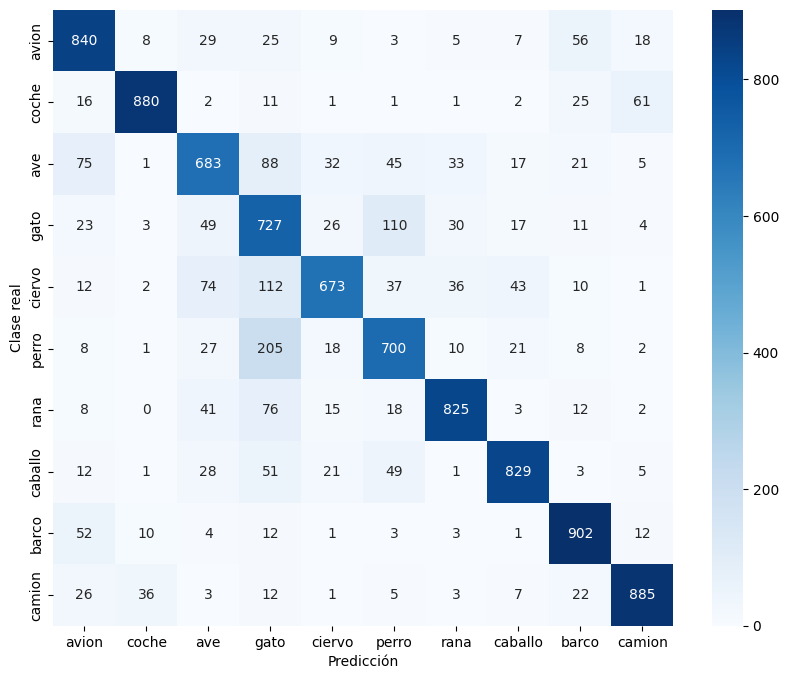

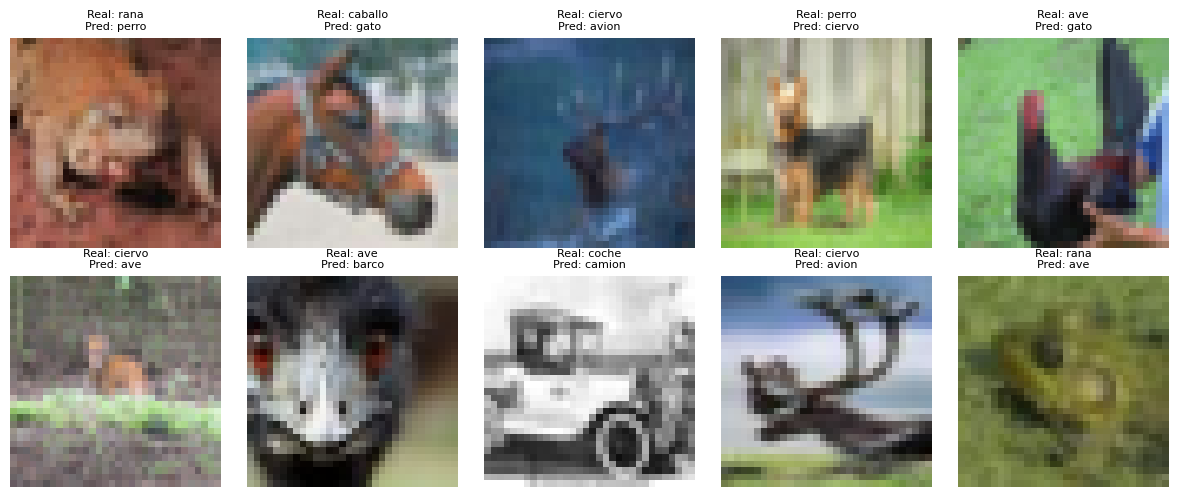

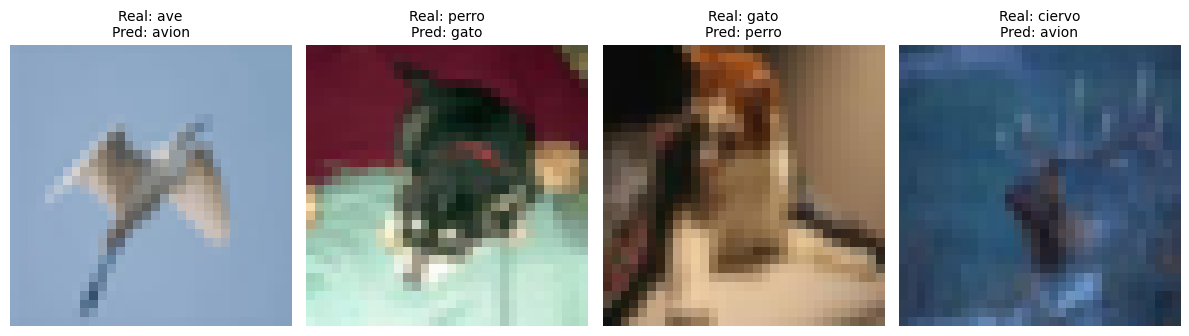

In [19]:
import numpy as np

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Índices de errores
errores = np.where(y_pred_classes != y_true_classes)[0]

# Contar errores por clase real
errores_por_clase = Counter(y_true_classes[errores])

for clase, cnt in errores_por_clase.items():
    print(f"{MAP_ELEMENTS[clase]}: {cnt} errores")

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[MAP_ELEMENTS[i] for i in range(10)],
            yticklabels=[MAP_ELEMENTS[i] for i in range(10)], cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Clase real")
plt.show()


plt.figure(figsize=(12,5))
for i, idx in enumerate(errores[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Real: {MAP_ELEMENTS[y_true_classes[idx]]}\nPred: {MAP_ELEMENTS[y_pred_classes[idx]]}", fontsize=8)
    plt.axis("off")
plt.tight_layout()
plt.show()



# Identificar errores específicos
indices_muestra = []

# Ave clasificada como avión
indices_muestra.extend([i for i in range(len(x_test))
                        if y_true_classes[i]==2 and y_pred_classes[i]==0][:1])

# Perro clasificado como gato
indices_muestra.extend([i for i in range(len(x_test))
                        if y_true_classes[i]==5 and y_pred_classes[i]==3][:1])

# Gato clasificado como perro
indices_muestra.extend([i for i in range(len(x_test))
                        if y_true_classes[i]==3 and y_pred_classes[i]==5][:1])

# Un ciervo cualquiera (no importa la predicción)
indices_muestra.extend([i for i in range(len(x_test))
                        if y_true_classes[i]==4][:1])

# Visualizar
plt.figure(figsize=(12,4))
for i, idx in enumerate(indices_muestra):
    plt.subplot(1,4,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Real: {MAP_ELEMENTS[y_true_classes[idx]]}\nPred: {MAP_ELEMENTS[y_pred_classes[idx]]}", fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()

##